In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Work/Sciencing/Google_CoLab_projects/WWD_Model/WWD_pytorch/wwd-model-fitting/final/

/content/drive/MyDrive/Work/Sciencing/Google_CoLab_projects/WWD_Model/WWD_pytorch/wwd-model-fitting/final


In [ ]:
import os
out_dir = '../data/HCP/'
base_dir = '../data/HCP/'
subs =sorted([sc_file[-10:-4] for sc_file in os.listdir(base_dir) if sc_file[:8] == 'weights_'])


In [ ]:
import time

In [ ]:
start_time = time.time()



#subs_s = ['562446', '257542', '154936' ] 

for i in range(0,1):
    
    
    
    node_size = 83
    mask = np.tril_indices(node_size, -1)
    num_epoches = 15
    batch_size = 20
    step_size = 0.05
    input_size = 2
    tr = 0.75
    repeat_size = 5
    sub=subs[i]
    print(i, sub)
    sc_file = base_dir +'weights_'+sub+'.txt'
    ts_file = base_dir +sub+'_rfMRI_REST1_LR_hpc200_clean__l2k8_sc33_ts.pkl'#out_dir+'sub_'+sub+'simBOLD_idt.txt'#
   
    if os.path.isfile(sc_file) and os.path.isfile(ts_file):
        sc = np.loadtxt(sc_file)
        SC =(sc+sc.T)*0.5
       
        sc = np.log1p(SC)/np.linalg.norm(np.log1p(SC))

        

        
        
        ts_pd = pd.read_pickle(ts_file)
        ts = ts_pd.values
        #ts = np.loadtxt(ts_file)
        ts =ts/np.max(ts)
        fc_emp = np.corrcoef(ts.T)
        # Get the WWD model module for forward in a batch. 

        data_mean = [ts.T]*num_epoches
        #data_mean = [gm]*num_epoches
        data_mean =np.array(data_mean)
        
        par = ParamsJR('WWD',  g=[100, 20], g_EE=[4.5, 1], g_EI =[0.4,5], g_IE=[0.4,5], I_0 =[0.34, 20])
                    #, w_bb=[sc, 50 * np.ones((node_size, node_size))])
        model = RNNWWD(node_size, batch_size, step_size, repeat_size, tr, sc, True, par)


        
        # call model fit method
        F = Model_fitting(model, data_mean, num_epoches, 2)

        # fit data(train)

        output_train = F.train()

        
end_time =  time.time()
print('running time is  {0} \'s'.format(end_time - start_time ))

0 100307


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:890: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch:  0 -21.987354
epoch:  0 0.4593791352045083 cos_sim:  -0.005073163649344328
epoch:  1 -23.897064
epoch:  1 0.5405563453553737 cos_sim:  -0.005029637575565767
epoch:  2 -25.289742
epoch:  2 0.5847691222964874 cos_sim:  -0.005022085378812841
epoch:  3 -26.330559
epoch:  3 0.5753209108610479 cos_sim:  -0.005797520598792371
epoch:  4 -27.227287
epoch:  4 0.6506540784362361 cos_sim:  -0.005282321575836349
epoch:  5 -28.082188
epoch:  5 0.642993798442313 cos_sim:  -0.0051996523944248425
epoch:  6 -28.680653
epoch:  6 0.6456216960977826 cos_sim:  -0.005233927726801527
epoch:  7 -29.408611
epoch:  7 0.675821116301792 cos_sim:  -0.0053480900438399506
epoch:  8 -29.971977
epoch:  8 0.6333088359277497 cos_sim:  -0.004677150016989588
epoch:  9 -30.495533
epoch:  9 0.6508127755077703 cos_sim:  -0.00558330520881445
epoch:  10 -30.967403
epoch:  10 0.6725926929373744 cos_sim:  -0.005176930168161007
epoch:  11 -31.355839
epoch:  11 0.689163805105782 cos_sim:  -0.005480039214362893
epoch:  12 -31

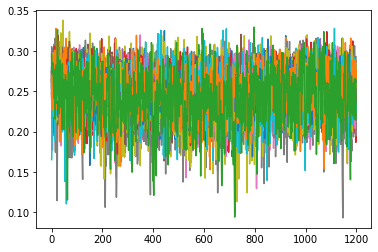

In [ ]:
plt.plot(F.output_sim.E_train.T)